In [2]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


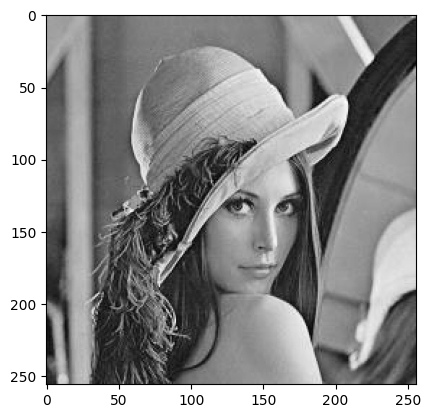

In [4]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg, cmap='gray')

In [5]:
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = int )
gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = int )

In [6]:
x = cv2.filter2D(gimg, -1, gx)
y = cv2.filter2D(gimg, -1, gy)

In [7]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

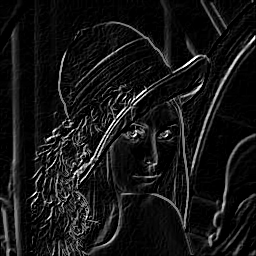

In [8]:
#outimg = outimg * 5
cv2_imshow(outimg)

In [9]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype = np.ubyte)

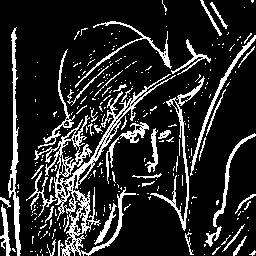

In [10]:
threshold = 40

for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if(outimg[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

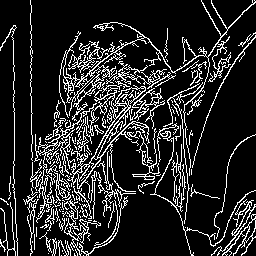

In [11]:
cannyimg = cv2.Canny(gimg, 20, 200)
cv2_imshow(cannyimg)

In [12]:
blurimg = cv2.GaussianBlur(gimg, (5,5), 1.4)

In [13]:
x = cv2.filter2D(gimg, -1, gx)
y = cv2.filter2D(gimg, -1, gy)

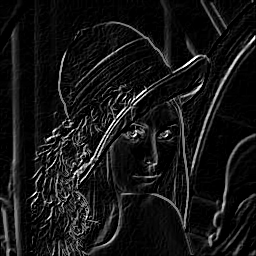

In [14]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutmg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(cannyOutmg)

In [15]:
cannyDirection = np.arctan2(y,x)